In [1]:
import csv
from datetime import datetime
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import random

1 - Read daily temperature data from CSV file

2 - Ignore/discard rows with incomplete data

In [2]:
# temperatures[city][month] = [temp1, temp2, ...]
temperatures = defaultdict(lambda: defaultdict(list))
with open('temperatures.csv', 'r') as temperatures_file:
    temperatures_file.readline()  # skip first line
    for line in temperatures_file:
        date, city, temperature = line.strip().split(',')
        if not (date == "" or city == "" or temperature == ""):  # complete data only
            datetime_object = datetime.strptime(date, "%Y-%m-%d")
            month = datetime_object.strftime("%B")  # %B = "January", %m = 1
            temperatures[city][month].append(float(temperature))

Calculate avg/min/max for each month

In [3]:
column_labels = ['City', 'Month', 'Average', 'Min', 'Max']
data_list = []
decimals_to_round_to = 2
for city in temperatures.keys():
    for month, temperatures_for_month in temperatures[city].items():
        # ex: month = January, temps = [temp1, temp2, ...]
        monthly_avg = np.round(np.average(temperatures_for_month), decimals_to_round_to)
        monthly_min = np.round(np.min(temperatures_for_month), decimals_to_round_to)
        monthly_max = np.round(np.max(temperatures_for_month), decimals_to_round_to)
        data = [city, month, monthly_avg, monthly_min, monthly_max]
        data_list.append(data)

3 - Make table with monthly avg., min, and max temp (per city)

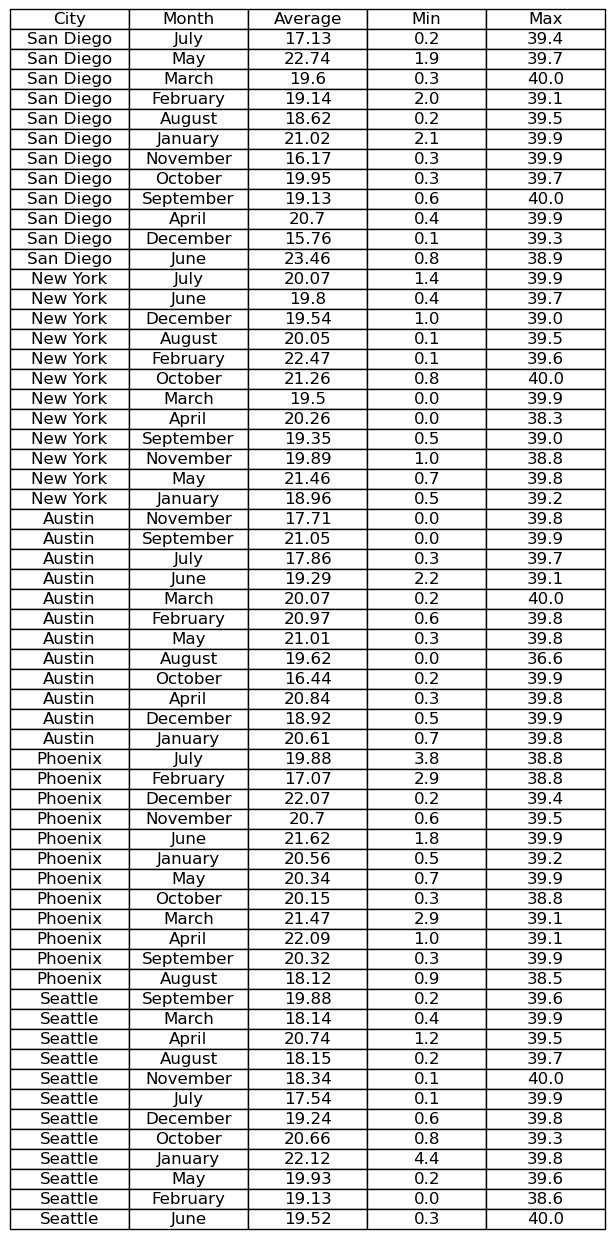

In [4]:
# Create a figure and axis
fig, ax = plt.subplots()

# Hide the axes
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.set_frame_on(False)

# Create the table
table = ax.table(cellText=data_list, colLabels=column_labels, cellLoc='center', loc='center')

# Auto-adjust layout
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Display the table
plt.show()

Save to CSV

In [5]:
export_file = 'processed-temperatures.csv'
with open(export_file, mode='w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows([column_labels] + data_list)

Function to identify city with hottest and coldest temperature in the table

Note: if two+ cities tie, only returns 1 at random

In [6]:
def find_coldest_city(_data):
    coldest_city = None
    coldest_temp = None
    for City, Month, Average, Min, Max in _data:
        if coldest_city is None:
            coldest_city = City
            coldest_temp = Min
        elif coldest_city == City:
            continue
        elif coldest_temp > Min:
            coldest_city = City
            coldest_temp = Min
    return [coldest_city, coldest_temp]


def find_hottest_city(_data):
    hottest_city = None
    hottest_temp = None
    for City, Month, Average, Min, Max in _data:
        if hottest_city is None:
            hottest_city = City
            hottest_temp = Max
        elif hottest_city == City:
            continue
        elif hottest_temp < Max:
            hottest_city = City
            hottest_temp = Max
    return [hottest_city, hottest_temp]


print("Coldest:", find_coldest_city(data_list), "\nHottest:", find_hottest_city(data_list))

Coldest: ['Austin', 0.0] 
Hottest: ['Austin', 40.0]


5 - Visualize daily avg. using a simple plot

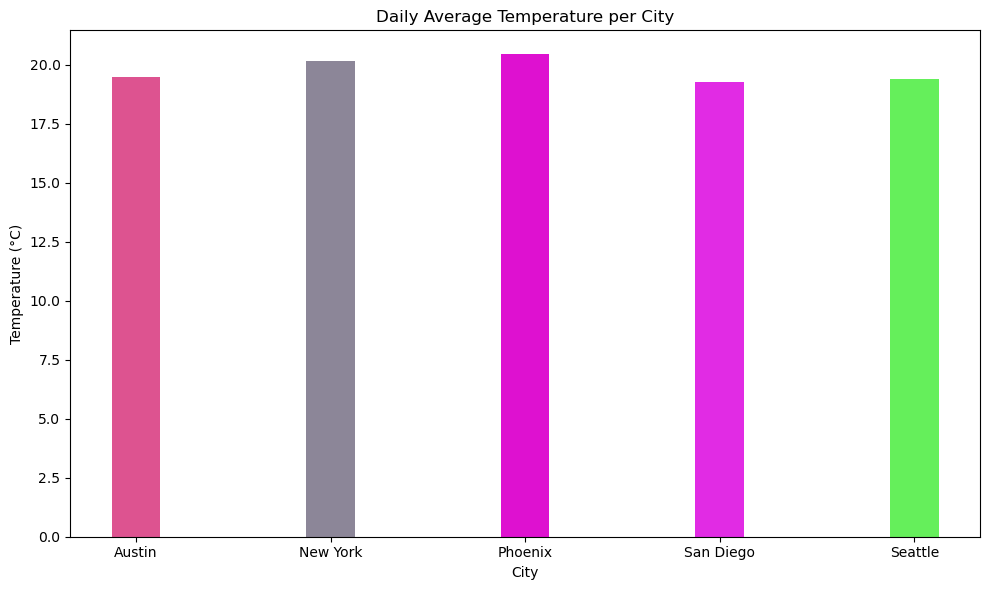

In [7]:
# [Austin, San Diego, ...]
cities = list(temperatures.keys())
cities.sort()

# [    22    ,       19     ,  ... ]
#    Austin       San Diego    ...
sorted_temperatures = []
for city in cities:  # now also sorted
    all_temps = []
    for month, temps in temperatures[city].items():
        all_temps += temps
    daily_avg = np.round(np.average(all_temps), decimals_to_round_to)
    sorted_temperatures.append(daily_avg)

# Plotting stuff
bar_width = 0.25
plt.figure(figsize=(10, 6))
color = ["#" + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(cities))]
plt.bar(cities, sorted_temperatures, bar_width, color=color)
plt.xlabel('City')
plt.ylabel('Temperature (°C)')
plt.title('Daily Average Temperature per City')

plt.tight_layout()
plt.show()